In [1]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


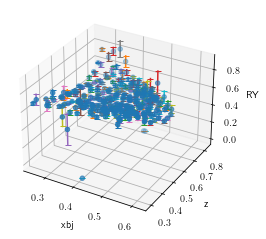

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv('results/forshuo.txt',header=None,delimiter=r"\s+")
df.columns = ["kin", "iz", "x", "Q2","W","z","Wp2","RY","RY_err","HovDp","HovDperr","HovDm","HovDmerr"]

df.describe()

xs = df['x']
zs = df['z']
RYs = df['RY']
RY_err = df['RY_err']
#ax.errorbar(xs,zs,RDs,RD_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RY = RYs[i]
    RY_error = RY_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_")
ax.scatter(xs,zs,RYs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RY")
plt.show()
#plt.savefig("RD_xbj_z")


In [3]:
#df[df['Q2'] == 4.75].head()
df.describe()
#df.head()

,kin,iz,x,Q2,W,z,Wp2,RY,RY_err,HovDp,HovDperr,HovDm,HovDmerr
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15.320000,11.353333,0.435077,4.435200,2.591433,0.544267,3.373150,0.622393,0.021120,0.628787,0.017350,0.299970,0.011463
std,9.393529,2.870998,0.085627,0.743749,0.278278,0.140185,1.096767,0.088520,0.020964,0.583840,0.026307,0.287516,0.027396
min,1.000000,6.000000,0.249000,2.661000,2.080000,0.292000,2.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,9.000000,0.369750,3.930250,2.396750,0.427000,2.495250,0.585750,0.011000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,11.000000,0.445000,4.353000,2.567500,0.527000,3.119000,0.622000,0.015500,1.077000,0.010000,0.477500,0.006000
75%,23.250000,14.000000,0.499250,4.981000,2.726250,0.673000,3.938250,0.665000,0.023000,1.162750,0.025000,0.553000,0.013000
max,32.000000,17.000000,0.619000,5.795000,3.360000,0.824000,7.640000,0.832000,0.173000,1.328000,0.220000,1.149000,0.349000


In [4]:
df = df[df['W']>2][df['Wp2']>2.8]
df.describe()

,kin,iz,x,Q2,W,z,Wp2,RY,RY_err,HovDp,HovDperr,HovDm,HovDmerr
count,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,14.137566,9.830688,0.417820,4.347291,2.65136,0.469788,3.961757,0.645672,0.018868,0.679275,0.016085,0.330016,0.009894
std,9.393984,2.236760,0.084522,0.732812,0.28860,0.108359,0.970135,0.073269,0.019227,0.573689,0.024312,0.287192,0.017620
min,1.000000,6.000000,0.249000,2.661000,2.10900,0.292000,2.805000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,0.348000,3.792000,2.44200,0.381000,3.216000,0.605000,0.011000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,10.000000,0.419000,4.275000,2.61100,0.475000,3.764000,0.642000,0.014000,1.100000,0.011000,0.511000,0.007000
75%,22.000000,11.000000,0.482000,4.943000,2.80000,0.529000,4.421000,0.682000,0.021000,1.162000,0.022000,0.573000,0.013000
max,32.000000,16.000000,0.609000,5.784000,3.36000,0.775000,7.640000,0.832000,0.173000,1.328000,0.220000,0.851000,0.164000


In [5]:
df.head()

,kin,iz,x,Q2,W,z,Wp2,RY,RY_err,HovDp,HovDperr,HovDm,HovDmerr
0,1,6,0.249,2.661,2.981,0.292,5.958,0.683,0.016,1.066,0.023,0.595,0.016
1,1,7,0.277,2.805,2.863,0.331,5.286,0.714,0.006,1.129,0.008,0.641,0.006
2,1,8,0.277,2.809,2.864,0.379,5.004,0.674,0.004,1.143,0.006,0.621,0.004
3,1,9,0.290,2.872,2.816,0.425,4.575,0.649,0.003,1.121,0.005,0.594,0.004
4,1,10,0.296,2.900,2.792,0.473,4.219,0.636,0.004,1.136,0.006,0.585,0.004


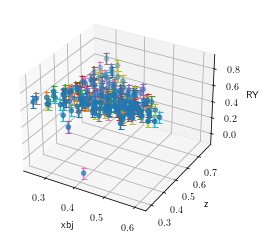

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = []
zs = []
RYs = []
for i,row in df.iterrows():
    #Q2corr = row['Q2']
    xbj = row['x']
    xs.append(xbj)
    zhad = row['z']
    zs.append(zhad)
    RY = row['RY']
    RYs.append(RY)
    RY_err = row['RY_err']
    ax.plot([xbj,xbj],[zhad,zhad],[RY+RY_error,RY-RY_error],marker="_")
ax.scatter(xs,zs,RYs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RY")
plt.show()


    

In [7]:
#CSVS_results = []
pdf_sets = []
i_FF = 6
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO","myDz","Geiger"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_rho'

In [8]:
def Get_mean(values):
    sums = 0
    for i in values:
        sums = sums+i
    return sums/len(values)
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)




In [9]:
def Get_Delta_z(Q,z_had):
    if i_FF == 0:
        #fDSS lo
        duplus = fDSS_.fdss(1,1,0,z_had,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_had,Q*Q)[0]
        delta_z = duminus/duplus
        return delta_z
    elif i_FF == 1:
        #fDSS nlo
        duplus = fDSS_.fdss(1,1,1,z_had,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_had,Q*Q)[0]
        delta_z = duminus/duplus
        return delta_z
    elif i_FF == 2:
        duplus = JAM20_FF.xfxQ(2,z_had,Q)
        duminus = JAM20_FF.xfxQ(-2,z_had,Q)
        delta_z = duminus/duplus
        return delta_z
    elif i_FF==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_had,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_had,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
        return delta_z
    elif i_FF==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_had,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_had,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
        return delta_z
    elif i_FF ==6:
        #Ratio of D-/D+ from P.Geiger's thesis HERMES
        R_D = (1.0-z_had)**0.0083583/(1.0+z_had)**1.9838
        delta_z = R_D
        return delta_z
    elif i_FF ==5:
        #first assumption CSV = 0
        '''
        parameters_0=(0.5837438039662431,-1.1844700435399933,1.6742194710533476)
        parameters_1=(0.5487693365000776,-1.0881946339773718,1.594995464377801)
        parameters_2=(0.38322380904636766,-0.47844410509432217,1.115729075281362)
        
        #second assumption, CSV = d
        parameters_0=(0.5993802704632198,-1.1404993637080942,1.649248197183764)
        parameters_1=(0.5495932327086159,-1.0049687610285973,1.5265333016901528)
        parameters_2=(0.3185881810309631,-0.02221386562798845,0.6840309157433447)
        '''
        parameter_0 = []
        parameter_1 = []
        parameter_2 = []
        if(i_assumption == '7ass_'):
            #7 assumption, rho subtracted
            parameters_0 = j_CSV2d_out[(i_assumption+'param')]["1stDzparam"]
            parameters_1 = j_CSV2d_out[(i_assumption+'param')]["2ndDzparam"]
            parameters_2 = j_CSV2d_out[(i_assumption+'param')]["3rdDzparam"]
        elif(i_assumption == '7ass_all_'):
            #7 assumption, all
            parameters_0 = j_CSV2d_out[(i_assumption+'param')]["Dzparam"]
            parameters_1 = j_CSV2d_out[(i_assumption+'param')]["Dzparam"]
            parameters_2 = j_CSV2d_out[(i_assumption+'param')]["Dzparam"]

        def Deltaz_param(z_had,params):
            delta_z = z_had**params[0]*(1-z_had)**params[1]
            return delta_z
        if Q<math.sqrt(4.5):
            return Deltaz_param(z_had,parameters_0)
        elif Q>math.sqrt(5):
            return Deltaz_param(z_had,parameters_2)
        else:
            return Deltaz_param(z_had,parameters_1)



In [10]:
def Get_Yield_ratio(pos_D2,pos_D2_err,neg_D2,neg_D2_err):
    yield_ratio = neg_D2/pos_D2
    yield_ratio_err = yield_ratio*math.sqrt(pos_D2_err**2/pos_D2**2+neg_D2_err**2/neg_D2**2)
    return yield_ratio,yield_ratio_err
'''
#first equation
a = 1
pdf_name = 'equation1'
def du_from_yield_ratio(Q,x,z,yield_ratio,yield_ratio_err):
    Delta_z = Get_Delta_z(Q,z)
    #du_ratio = du/(u_v+d_v)
    du_ratio = ((4*Delta_z+1)-yield_ratio*(4+Delta_z))/(yield_ratio*(4-Delta_z)-(4*Delta_z-1))
    uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
    dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    du = du_ratio*(uv+dv)
    coea = (4*Delta_z+1)/(4-Delta_z)-(4*Delta_z-1)*(4+Delta_z)/(4-Delta_z)**2
    coeb = (4*Delta_z-1)/(4-Delta_z)
    sig_du = coea*yield_ratio_err/(yield_ratio-coeb)**2
    sig_du = sig_du*(uv+dv)
    #sig_du = (uv+dv)*du*(4-Delta_z)*yield_ratio_err/(yield_ratio*(4-Delta_z)-(4*Delta_z-1))
    return du,sig_du
    
'''
#a = 1
#pdf_name = 'e2'
#a = 0.5
#pdf_name = 'e2_a2'
a = 0.25
pdf_name = 'e2_a3'
#second equation
#second equation
def du_from_yield_ratio(Q,x,z,yield_ratio,yield_ratio_err):
    Delta_z = Get_Delta_z(Q,z)
    u = JAM20_PDF.xfxQ(2,xbj,Q)
    ub = JAM20_PDF.xfxQ(-2,xbj,Q)
    d = JAM20_PDF.xfxQ(1,xbj,Q)
    db = JAM20_PDF.xfxQ(-1,xbj,Q)
    T = (ub+db)/(u+d)
    strange = JAM20_PDF.xfxQ(3,xbj,Q)
    sb = JAM20_PDF.xfxQ(-3,xbj,Q)
    S = 2*(strange+sb)/(u+d)

    Y = yield_ratio
    A = 4*Delta_z+T*Delta_z+S*Delta_z+1+4*T
    B = (4*T*Delta_z+Delta_z+S*Delta_z+4+T)
    C = 4*a-Delta_z
    D = (4*a*Delta_z-1)
    du_ratio = (A-B*Y)/(C*Y-D)
    #du_ratio = (4*Delta_z+T*Delta_z+S*Delta_z+1-Y*(4*T*Delta_z+Delta_z+S*Delta_z)-Y*(4+T))/((4*a-Delta_z)*Y-(4*a*Delta_z-1)) 
    du = du_ratio*(u+d)
    sig_du = B/C*(A*C/B-D)*C*yield_ratio_err/(C*yield_ratio-D)**2
    sig_du = sig_du*(u+d)
    return du,sig_du


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_35804/76699722.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax,fig = plt.subplots()


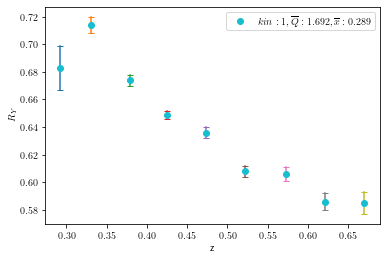

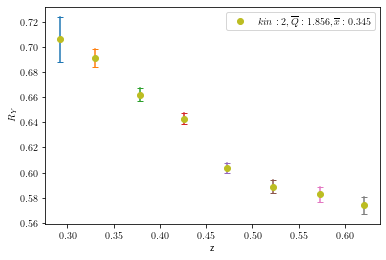

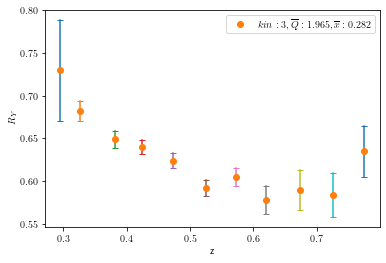

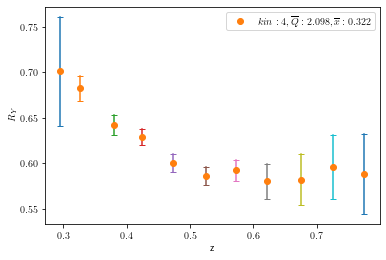

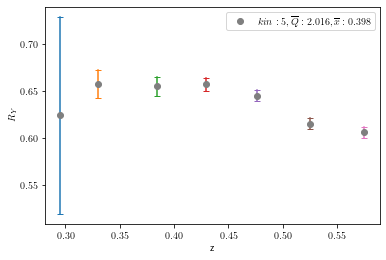

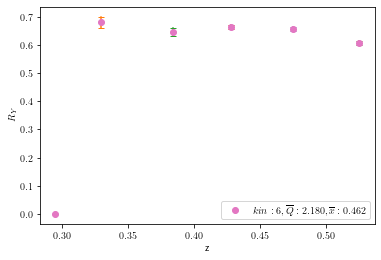

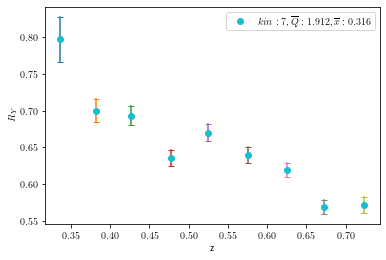

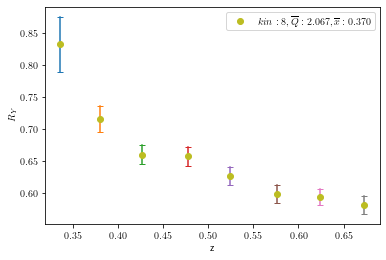

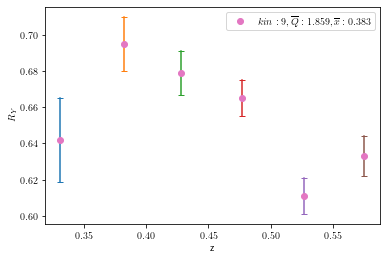

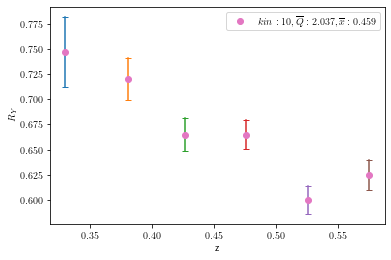

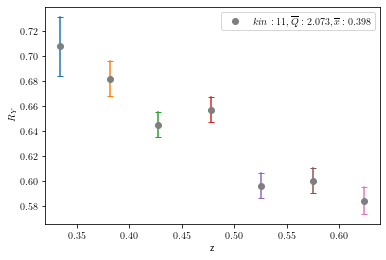

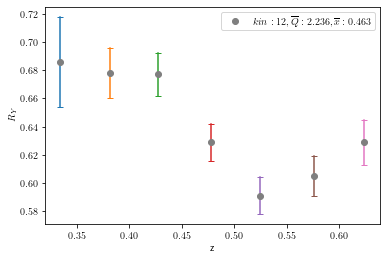

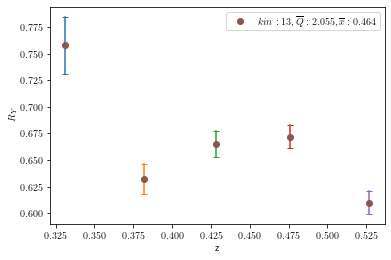

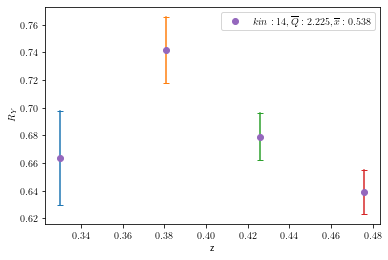

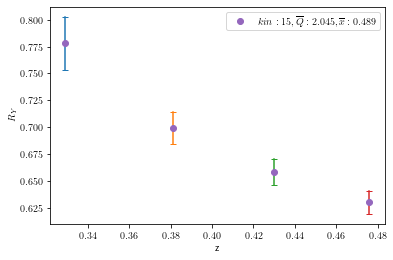

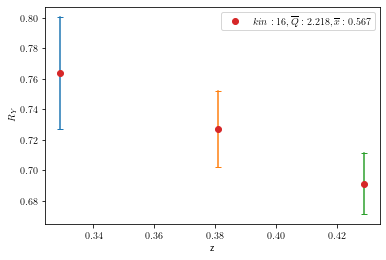

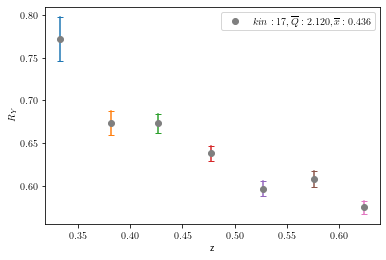

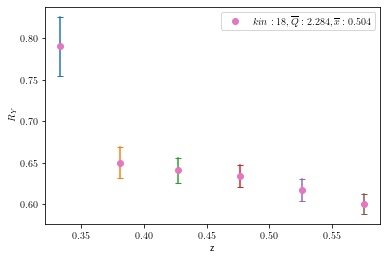

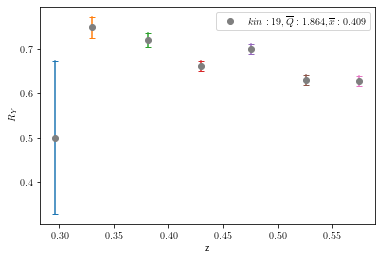

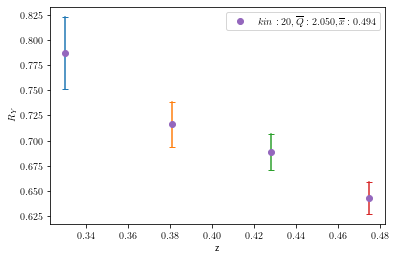

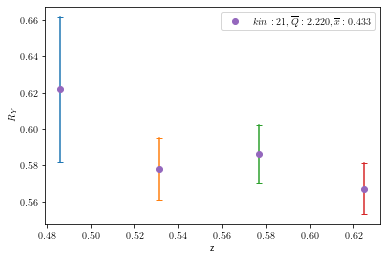

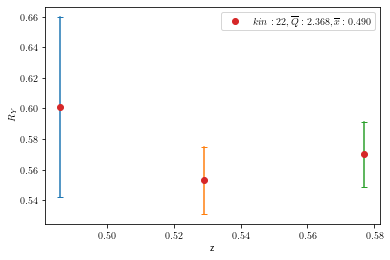

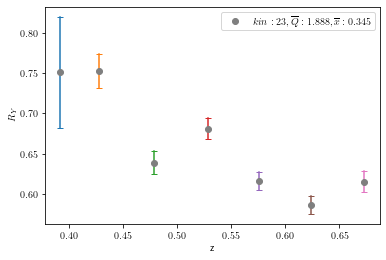

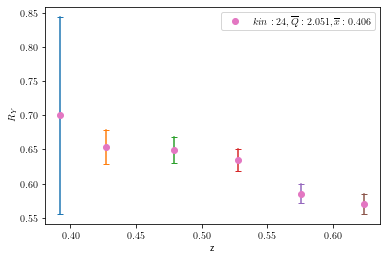

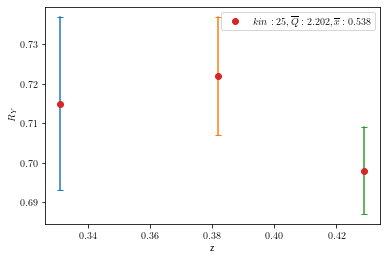

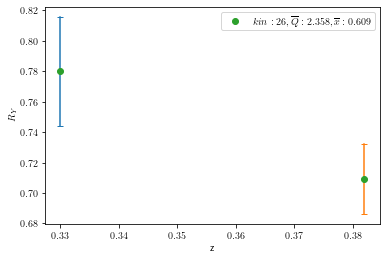

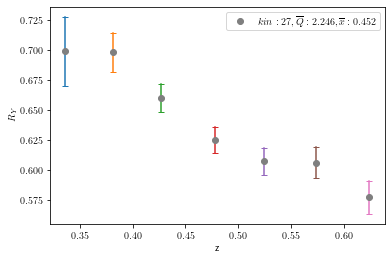

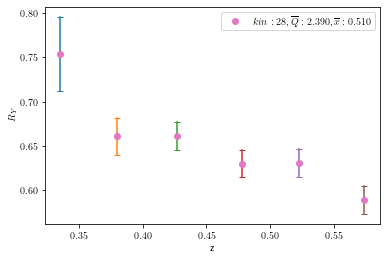

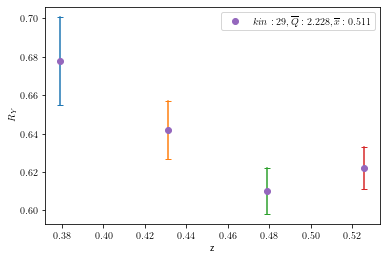

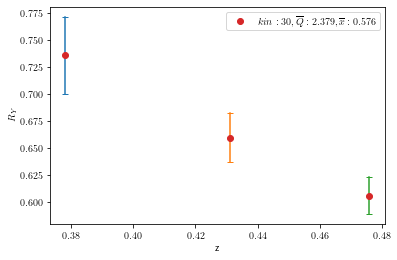

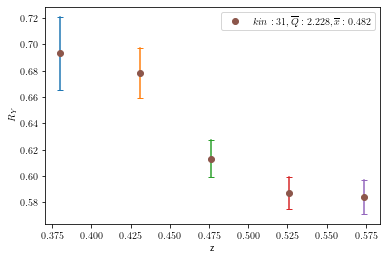

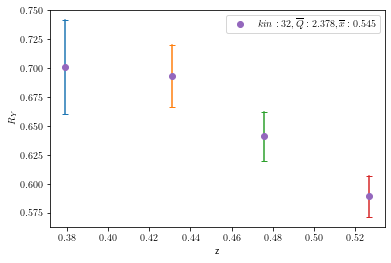

In [11]:
kins = df['kin'].unique()
for kin in kins:
    zs = []
    RYs = []
    Qs = []
    xs = []
    ax,fig = plt.subplots()
    for i,row in df[df['kin']==kin].iterrows():
        Q = math.sqrt(row['Q2'])
        x = row['x']
        z = row['z']
        zs.append(z)
        Qs.append(Q)
        xs.append(x)
        RY = row['RY']
        RY_err = row['RY_err']
        RYs.append(RY)
        plt.plot([z,z],[RY+RY_err,RY-RY_err],marker = "_")
    Q_ave = Get_mean(Qs)
    x_ave = Get_mean(xs)
    plt.plot(zs,RYs,"o",label = f"$kin:{kin},\overline{{Q}}:{Q_ave:.3f},\overline{{x}} :{x_ave:.3f}$")
    plt.xlabel('z')
    plt.ylabel(r'$R_Y$')
    plt.legend()
    #plt.savefig(f"results/RY_kin_{kin}.pdf")

        #print(row)

In [12]:

def delta_udv(parameter):
    #x = np.arange(0.2,0.7,0.01)
    x = np.linspace(0.2,0.7,50)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)
#x_axis = np.arange(0.2,0.7,0.01)
x_axis = np.linspace(0.2,0.7,50)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)


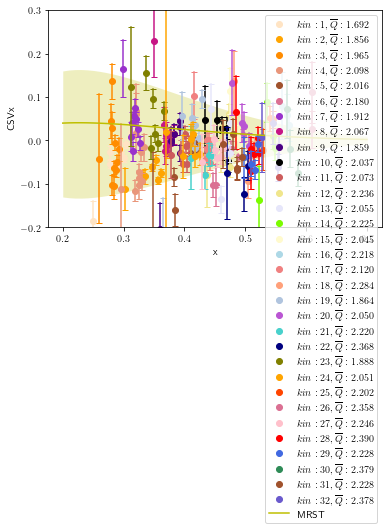

In [13]:
kins = df['kin'].unique()
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
ax,fig = plt.subplots()
i_col = 0
for kin in kins:
    zs = []
    CSVs = []
    Qs = []
    xs = []
    
    for i,row in df[df['kin']==kin].iterrows():
        Q = math.sqrt(row['Q2'])
        x = row['x']
        z = row['z']
        zs.append(z)
        Qs.append(Q)
        xs.append(x)
        RY = row['RY']
        RY_err = row['RY_err']
        du = du_from_yield_ratio(Q,x,z,RY,RY_err)[0]
        CSV = -(1+a)*du
        CSVs.append(CSV)
        CSV_err = -(1+a)*du_from_yield_ratio(Q,x,z,RY,RY_err)[1]
        plt.plot([x,x],[CSV-CSV_err,CSV+CSV_err],marker = "_",color = colors_all[i_col])
    Q_ave = Get_mean(Qs)
    plt.plot(xs,CSVs,"o",label = f"$kin:{kin},\overline{{Q}}:{Q_ave:.3f}$",color = colors_all[i_col])
    i_col = i_col+1

plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')    

plt.xlabel('x')
plt.ylabel(r'CSVx')
plt.ylim(-0.2,0.3)
plt.legend()
plt.savefig(f"results/CSVx_{pdf_name}.pdf")

        #print(row)

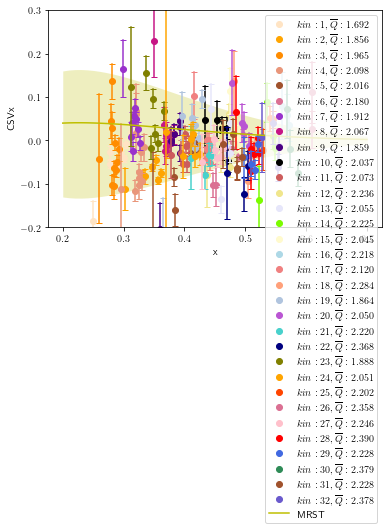

In [13]:
kin_xs = [0.025,0.075,0.125,0.175,0.225,0.275,0.325,0.375,0.425,0.475,0.525,0.575,0.625,0.675,0.725,0.775,0.825,0.875,0.725,0.975]
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
ax,fig = plt.subplots()
i_col = 0
for kin in kins:
    
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')    

plt.xlabel('x')
plt.ylabel(r'CSVx')
plt.ylim(-0.2,0.3)
plt.legend()
plt.savefig(f"results/CSVx_{pdf_name}.pdf")

        #print(row)

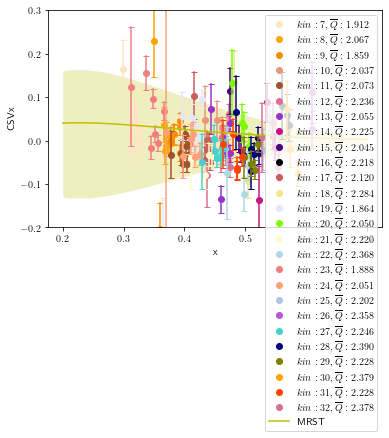

In [15]:
kins = df[df['kin']>6]['kin'].unique()
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
ax,fig = plt.subplots()
i_col = 0
for kin in kins:
    zs = []
    CSVs = []
    Qs = []
    xs = []
    
    for i,row in df[df['kin']==kin].iterrows():
        Q = math.sqrt(row['Q2'])
        x = row['x']
        z = row['z']
        zs.append(z)
        Qs.append(Q)
        xs.append(x)
        RY = row['RY']
        RY_err = row['RY_err']
        du = du_from_yield_ratio(Q,x,z,RY,RY_err)[0]
        CSV = -(1+a)*du
        CSVs.append(CSV)
        CSV_err = -(1+a)*du_from_yield_ratio(Q,x,z,RY,RY_err)[1]
        plt.plot([x,x],[CSV-CSV_err,CSV+CSV_err],marker = "_",color = colors_all[i_col])
    Q_ave = Get_mean(Qs)
    plt.plot(xs,CSVs,"o",label = f"$kin:{kin},\overline{{Q}}:{Q_ave:.3f}$",color = colors_all[i_col])
    i_col = i_col+1

plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')    

plt.xlabel('x')
plt.ylabel(r'CSVx')
plt.ylim(-0.2,0.3)
plt.legend()
plt.savefig(f"results/CSVx_{pdf_name}_CSV.pdf")

        #print(row)